## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">Import Libraries📚</div>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# for data visualization

In [3]:
import requests

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">Gathering Data </div>


In [4]:
twitter_archive_enhanced_original = pd.read_csv("twitter-archive-enhanced.csv")

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

if response.status_code == 200:
  with open("image_predictions.tsv", "w") as outfile:
    outfile.write(response.text)
else:
  print(f"Error downloading Image prediction.tsv file. Status code: {response.status_code}")

image_predictions_original = pd.read_csv("image_predictions.tsv", delimiter='\t')

In [6]:

url = "https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json"
response = requests.get(url)

if response.status_code == 200:
    with open("df_json.txt", "w") as outfile:
        outfile.write(response.text)
else:
    print(f"Error downloading JSON file. Status code: {response.status_code}")

In [7]:
data = []
with open("df_json.txt", "r") as infile:
    for line in infile:
        data.append(pd.read_json(line, lines=True)) # reading file line by line and adding it to the list

# Concatenate all json objects into a single DataFrame

C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1860647286.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True)) # reading file line by line and adding it to the list
C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1860647286.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True)) # reading file line by line and adding it to the list
C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1860647286.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True)) # reading file line by line and adding it to the 

In [8]:
df_json_original = pd.concat(data, ignore_index=True)

In [9]:
df_json = df_json_original.copy()
twitter_archive_enhanced = twitter_archive_enhanced_original.copy()
image_predictions = image_predictions_original.copy()
# making a copy for evey data

In [10]:
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">Exploring Data🔍 </div>

In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [12]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

array([[<Axes: title={'center': 'tweet_id'}>,
        <Axes: title={'center': 'in_reply_to_status_id'}>,
        <Axes: title={'center': 'in_reply_to_user_id'}>],
       [<Axes: title={'center': 'retweeted_status_id'}>,
        <Axes: title={'center': 'retweeted_status_user_id'}>,
        <Axes: title={'center': 'rating_numerator'}>],
       [<Axes: title={'center': 'rating_denominator'}>, <Axes: >,
        <Axes: >]], dtype=object)

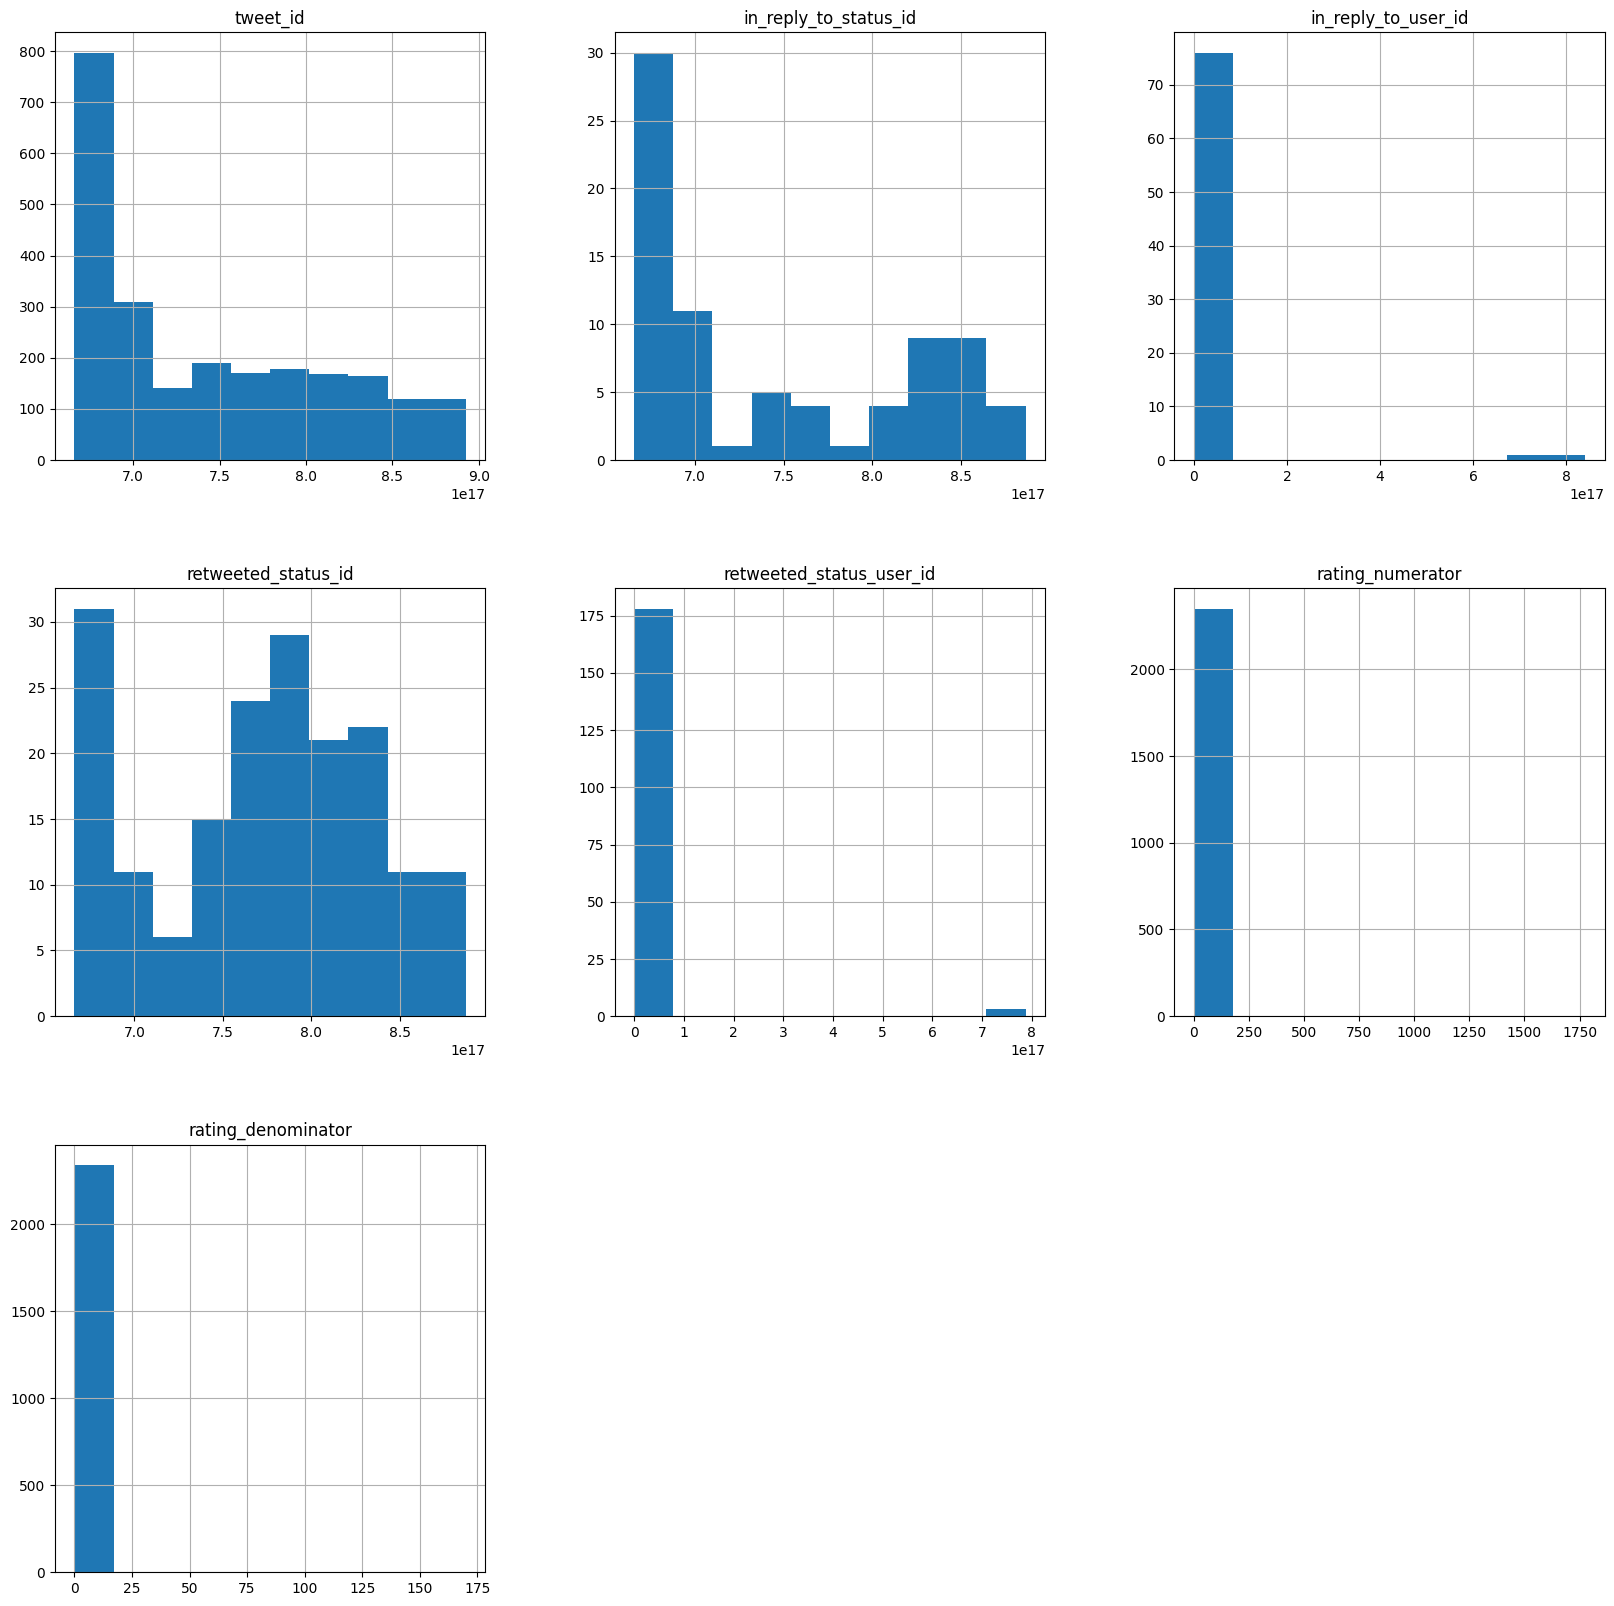

In [13]:
twitter_archive_enhanced.hist(figsize=(20,20))

In [14]:
twitter_archive_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [15]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
# droping unwanted columns
twitter_archive_enhanced2 = twitter_archive_enhanced.drop(columns=["name","source","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"],axis=1)

In [17]:
twitter_archive_enhanced2.isnull().sum()

tweet_id                    0
in_reply_to_status_id    2278
in_reply_to_user_id      2278
timestamp                   0
text                        0
expanded_urls              59
rating_numerator            0
rating_denominator          0
doggo                    2259
floofer                  2346
pupper                   2099
puppo                    2326
dtype: int64

## Issue : Doggo,floofer,pupper has weird values

## Define : They have weird values and i want to remove these values to make it only true or false

## code :



In [18]:
twitter_archive_enhanced2[['floofer','pupper','puppo','doggo']].sample(5)

,floofer,pupper,puppo,doggo
1511,NaN,NaN,NaN,NaN
2211,NaN,NaN,NaN,NaN
2150,NaN,NaN,NaN,NaN
1585,NaN,NaN,NaN,NaN
816,NaN,NaN,NaN,NaN


In [19]:
print(twitter_archive_enhanced2['floofer'].unique())
print(twitter_archive_enhanced2['pupper'].unique())
print(twitter_archive_enhanced2['puppo'].unique())
print(twitter_archive_enhanced2['doggo'].unique())

# okay now i will replace all of this by true or false

[nan 'floofer']
[nan 'pupper']
[nan 'puppo']
[nan 'doggo']


In [20]:
twitter_archive_enhanced2['floofer'] = twitter_archive_enhanced2['floofer'].replace({'floofer': True}).fillna(False)
twitter_archive_enhanced2['pupper'] = twitter_archive_enhanced2['pupper'].replace({'pupper': True}).fillna(False)
twitter_archive_enhanced2['puppo'] = twitter_archive_enhanced2['puppo'].replace({'puppo': True}).fillna(False)
twitter_archive_enhanced2['doggo'] = twitter_archive_enhanced2['doggo'].replace({'doggo': True}).fillna(False)

C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1152880638.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_archive_enhanced2['floofer'] = twitter_archive_enhanced2['floofer'].replace({'floofer': True}).fillna(False)
C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1152880638.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_archive_enhanced2['pupper'] = twitter_archive_enhanced2['pupper'].replace({'pupper': True}).fillna(False)
C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1152880638.py:3: FutureWarning: Downcasting object dtype

## Test

In [21]:
print(twitter_archive_enhanced2['floofer'].unique())
print(twitter_archive_enhanced2['pupper'].unique())
print(twitter_archive_enhanced2['puppo'].unique())
print(twitter_archive_enhanced2['doggo'].unique())


[False  True]
[False  True]
[False  True]
[False  True]


In [22]:
twitter_archive_enhanced2['pupper'].iloc[1970]

True

In [23]:
twitter_archive_enhanced2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   text                   2356 non-null   object 
 5   expanded_urls          2297 non-null   object 
 6   rating_numerator       2356 non-null   int64  
 7   rating_denominator     2356 non-null   int64  
 8   doggo                  2356 non-null   bool   
 9   floofer                2356 non-null   bool   
 10  pupper                 2356 non-null   bool   
 11  puppo                  2356 non-null   bool   
dtypes: bool(4), float64(2), int64(3), object(3)
memory usage: 156.6+ KB


In [24]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

array([[<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'id_str'}>,
        <Axes: title={'center': 'in_reply_to_status_id'}>],
       [<Axes: title={'center': 'in_reply_to_status_id_str'}>,
        <Axes: title={'center': 'in_reply_to_user_id'}>,
        <Axes: title={'center': 'in_reply_to_user_id_str'}>,
        <Axes: title={'center': 'geo'}>],
       [<Axes: title={'center': 'coordinates'}>,
        <Axes: title={'center': 'contributors'}>,
        <Axes: title={'center': 'retweet_count'}>,
        <Axes: title={'center': 'favorite_count'}>],
       [<Axes: title={'center': 'quoted_status_id'}>,
        <Axes: title={'center': 'quoted_status_id_str'}>, <Axes: >,
        <Axes: >]], dtype=object)

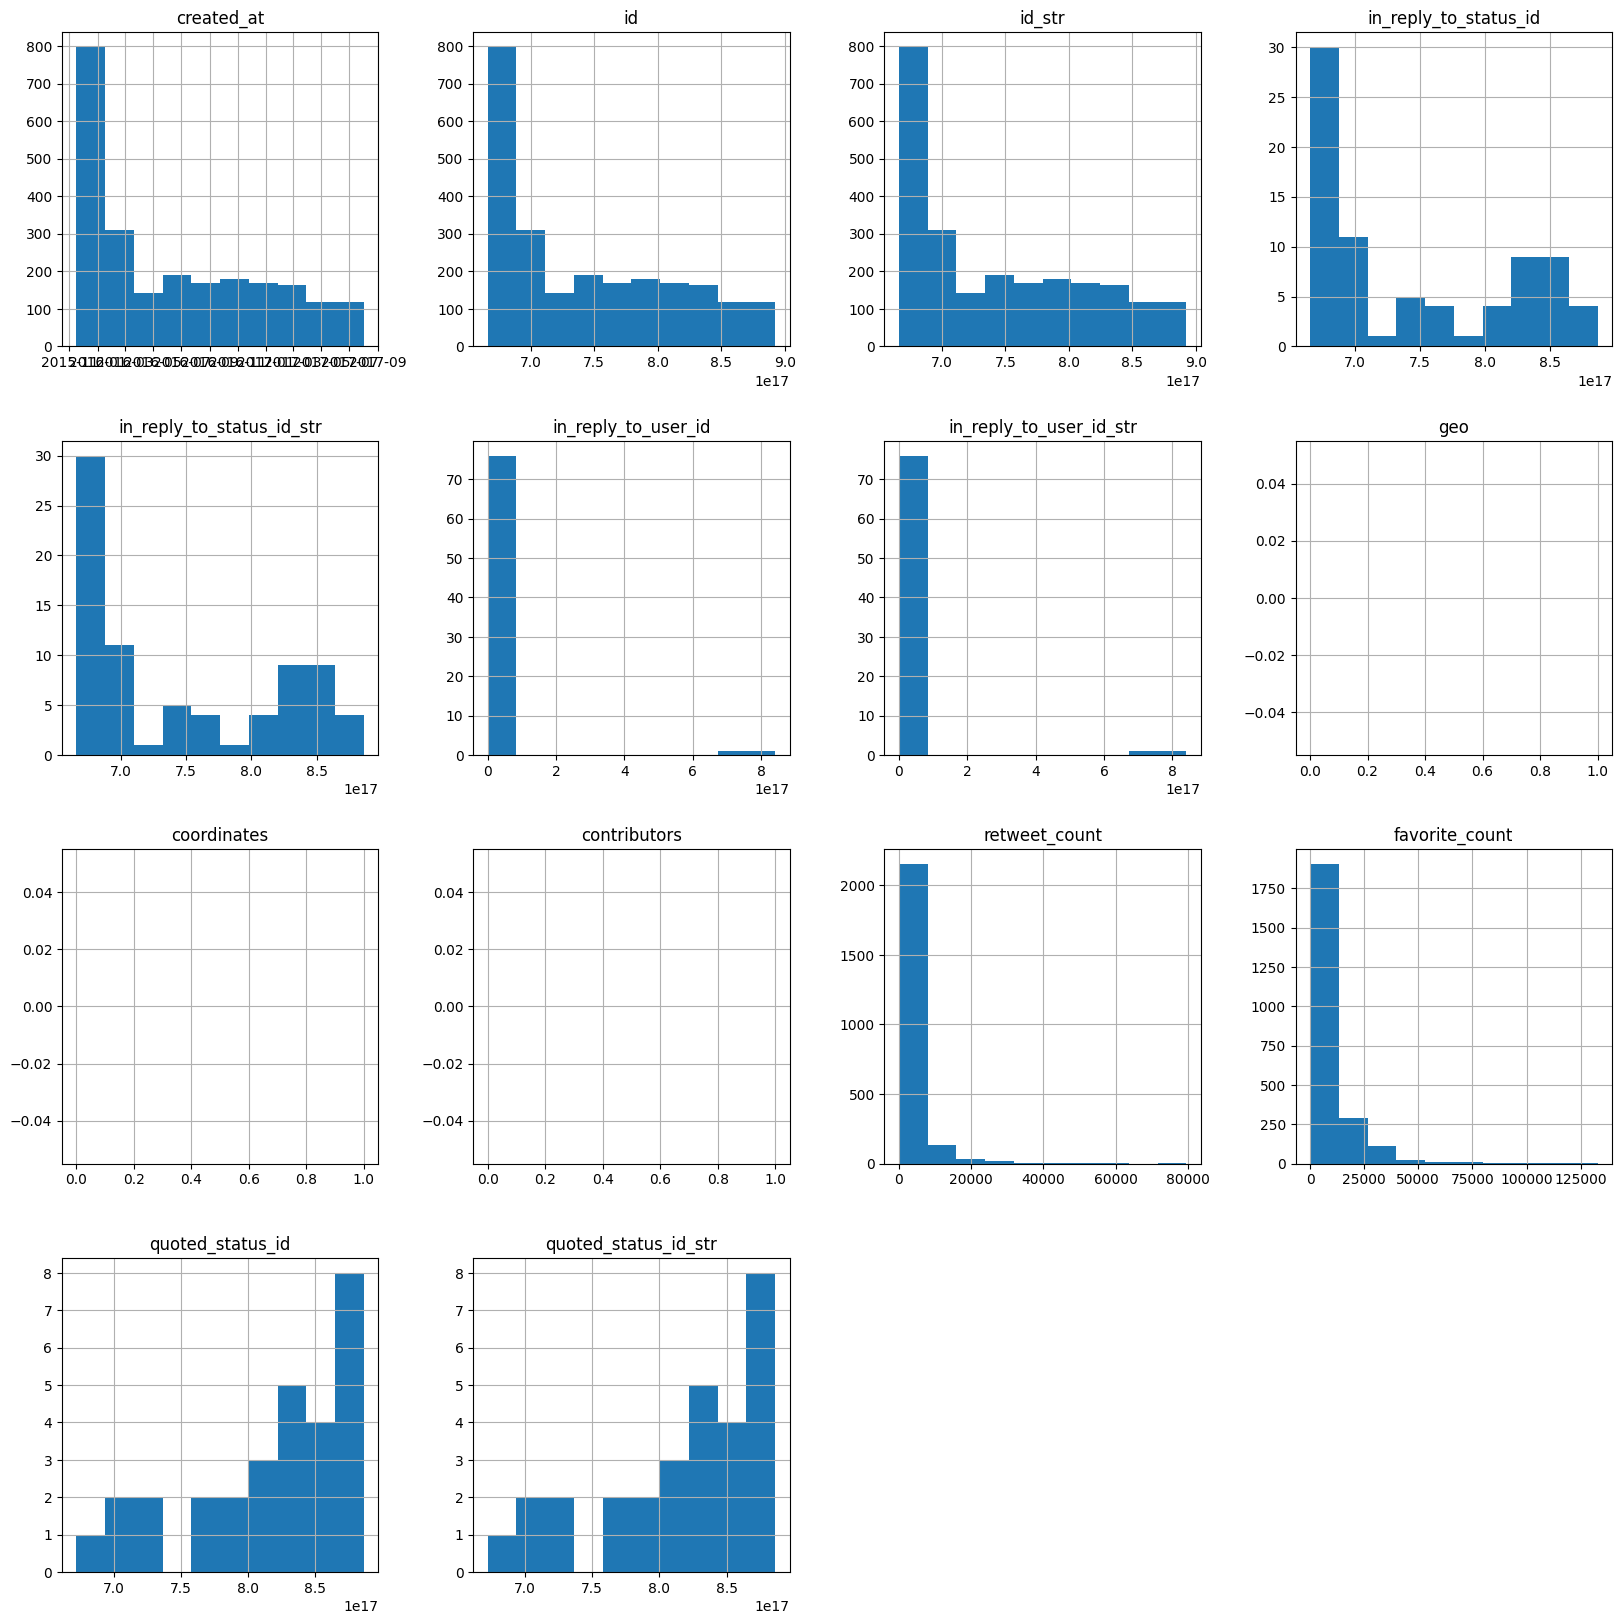

In [25]:
df_json.hist(figsize=(20,20))

In [26]:
df_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [27]:
df_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,8.860534e+17,8.860534e+17


In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


array([[<Axes: title={'center': 'tweet_id'}>,
        <Axes: title={'center': 'img_num'}>],
       [<Axes: title={'center': 'p1_conf'}>,
        <Axes: title={'center': 'p2_conf'}>],
       [<Axes: title={'center': 'p3_conf'}>, <Axes: >]], dtype=object)

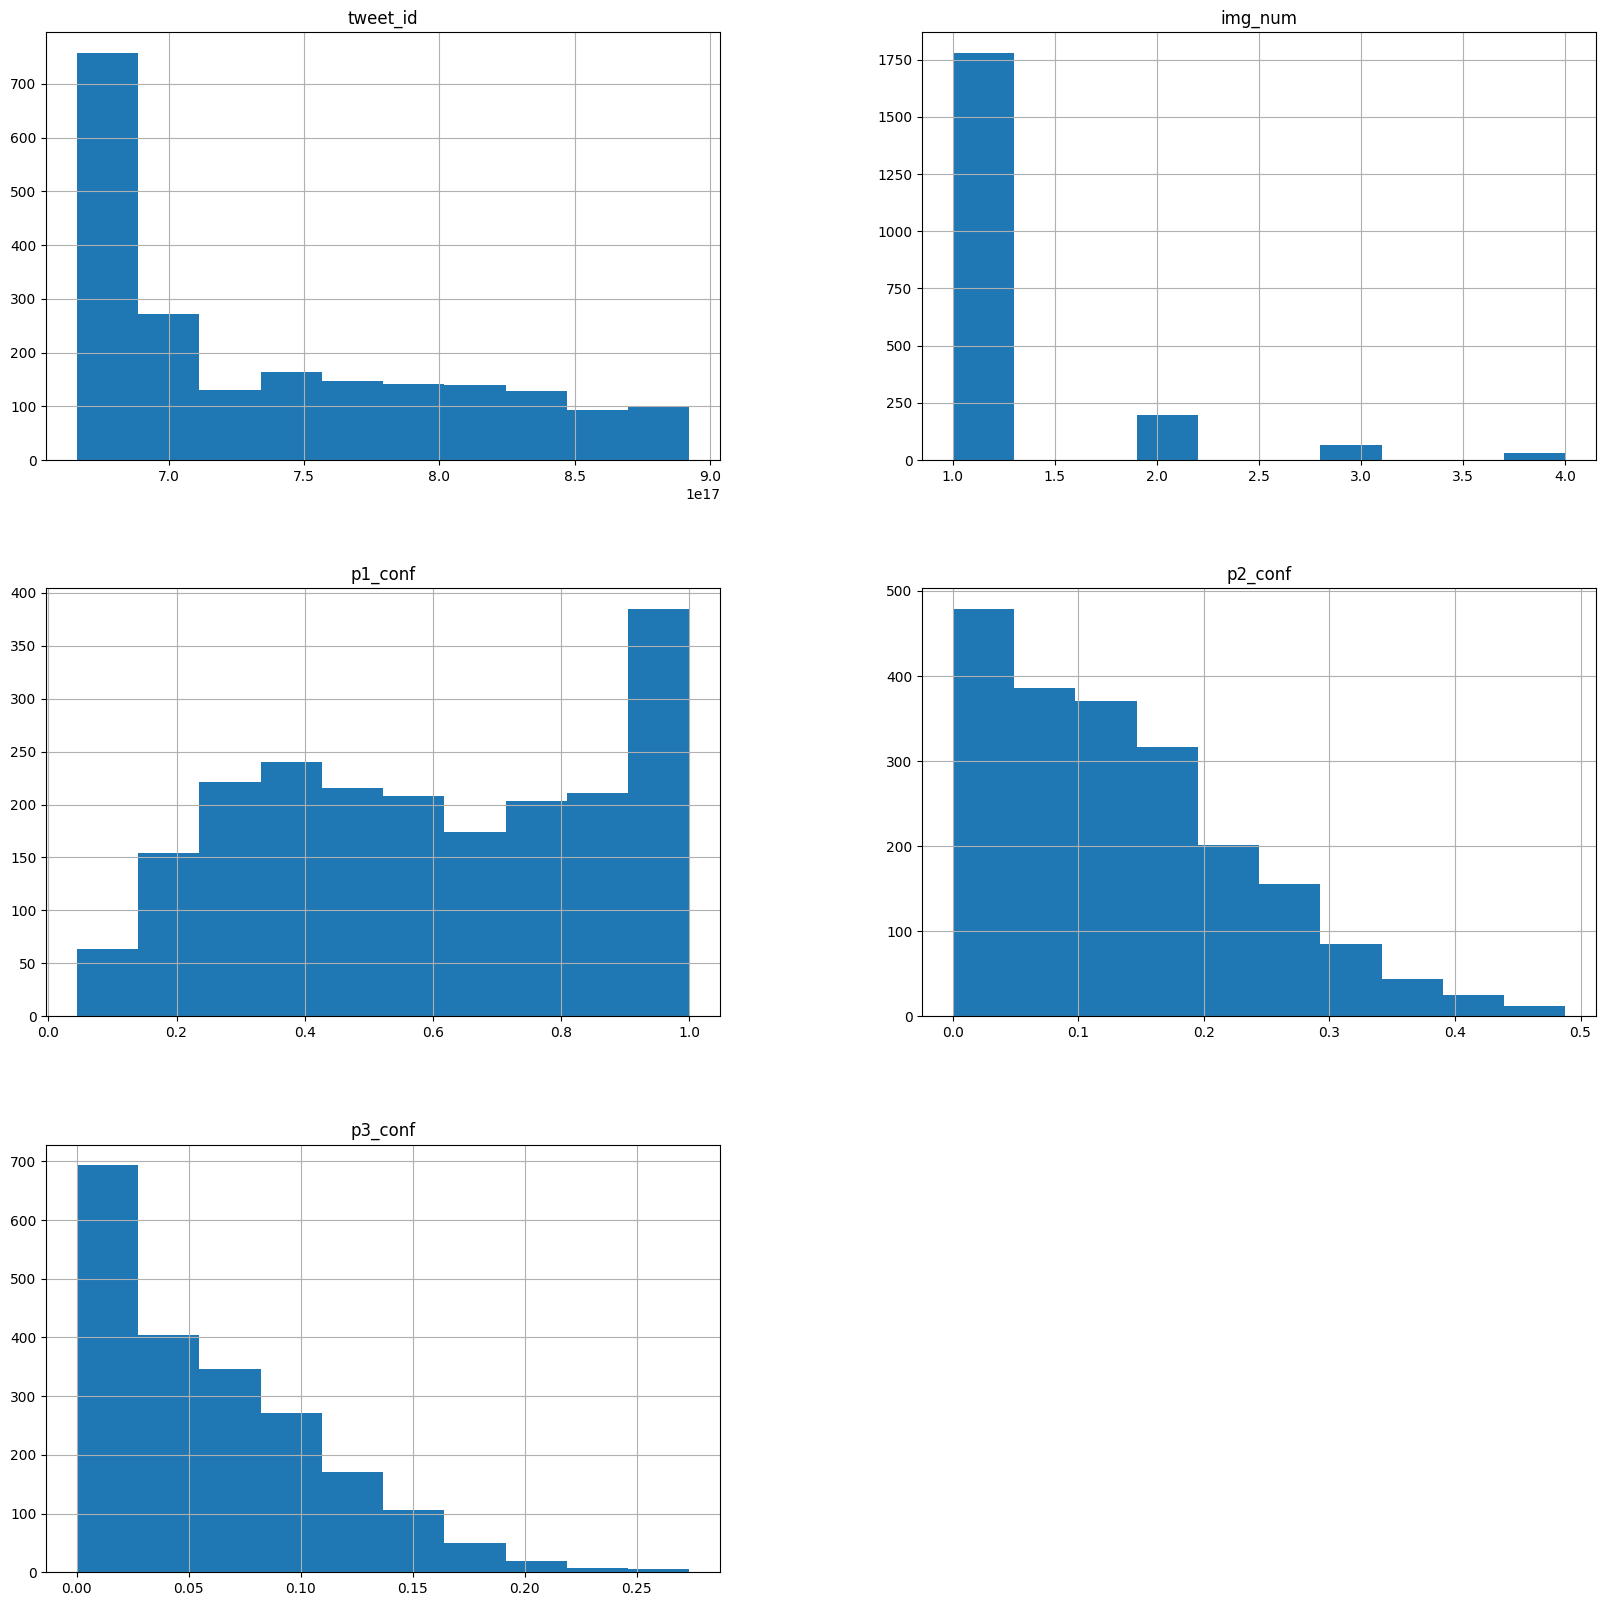

In [29]:
image_predictions.hist(figsize=(20,20))

In [30]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
969,706516534877929472,https://pbs.twimg.com/media/Cc4NCQiXEAEx2eJ.jpg,1,golden_retriever,0.772685,True,Labrador_retriever,0.071665,True,golfcart,0.020993,False
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
794,690932576555528194,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False
828,693590843962331137,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
788,690400367696297985,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,1,Pembroke,0.426459,True,papillon,0.317368,True,Shetland_sheepdog,0.077616,True
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True


In [31]:
json_data_master = df_json.copy()
image_predictions_master = image_predictions.copy()
twitter_archive_enhanced_master = twitter_archive_enhanced.copy()

In [32]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


## <div style="text-align: left; background-color: #298B6C ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">What is wrong with These data and how i will Deal with it</div>

## <div style="text-align: left; background-color: #00FF4D ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">The problems</div>

## <div style="text-align: left; background-color: #20C591 ; font-family: Trebuchet MS; color: white; padding: 2px; line-height:2;border-radius:1px; font-size: 20px; border-radius: 16px 5px 0 0;  ">** Null Values are alot in this data there is might be different reasons :<br>in_reply_to_status_id : 2278 and in_reply_to_user_id : 2278 has the same null values that might be because they have similar reason. <br><br> ** Retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. These columns have the same null value which is 2175 and that be also for a similar reason it might the same reason for the previous columns. <br><br>** Also There is alot of null values in other columns like Name,doggo,floofer,pupper,puppo,doggo,expanded_urls.<br><br>**timestamp column as object <br><br>**entities column is a dic. and have some empty data that does count as missing values <br><br>**display_test_rang column has a list of 2 values that i have to make each value in a separtated column<br><br>**user Column have the same value in all rows and that does not make sense<br><br>**possibly_sensitive_appealable column it only has two values which is 0 and nan same as possibly_sensitive </div>

## <div style="text-align: left; background-color: #20C591 ; font-family: Trebuchet MS; color: white; padding: 2px; line-height:2;border-radius:1px; font-size: 20px; border-radius: 16px 5px 0 0;  ">Quality : <ul><li>Inconsistent dog stage labels in twitter_archive_enhanced.csv.</li><li>Missing values in name, doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv.</li><li>Inconsistent date/time format in timestamp column in twitter_archive_enhanced.csv.</li><li>Missing values in image predictions for some tweets in image-predictions.tsv.</li><li>Unclear meaning of some columns in tweet-json.txt like "entities"</li><li>Inconsistent capitalization in dog breed predictions in image-predictions.tsv.</li></ul>Tidiness issues <ul><li>Dog stage information spread across multiple columns (doggo, floofer, pupper, puppo) in twitter_archive_enhanced.csv.</li></ul></div>

## Issue : Doggo,floofer,pupper is in a different columns

## Define : They are in a separated columns

## code :



In [33]:

def count_age():
    doggo = 0
    floofer = 0
    pupper = 0
    puppo = 0
    df1 = twitter_archive_enhanced2[["doggo","floofer","pupper","puppo"]]
    for i in df1["doggo"]:
        if i == True:
            doggo += 1
        else:
            False
    for x in  df1["floofer"]:
        if x == True:
            floofer += 1
        else:
            False
    for y in  df1["pupper"]:
        if y == True:
            pupper += 1
        else:
            False
    for z in  df1["puppo"]:
        if z == True:
            puppo += 1
        else:
            False

    return doggo,floofer,puppo,pupper

In [34]:
doggo_count,floofer_count,puppo_count,pupper_count=count_age()

## Test

In [35]:
doggo_count,floofer_count,puppo_count,pupper_count

(97, 10, 30, 257)

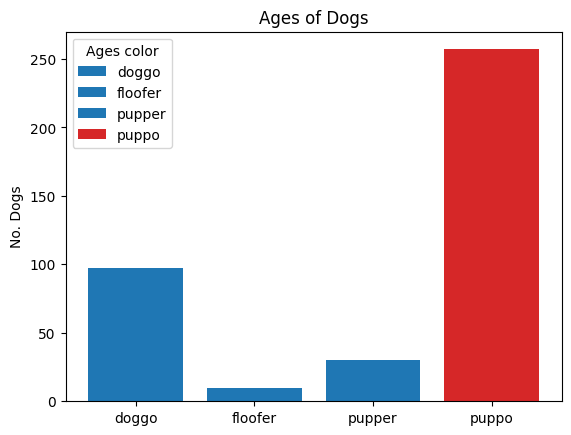

In [36]:

fig, ax = plt.subplots()

ages = ["doggo","floofer","pupper","puppo"]
counts = doggo_count,floofer_count,puppo_count,pupper_count
bar_labels = ["doggo","floofer","pupper","puppo"]
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:red']

ax.bar(ages, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('No. Dogs')
ax.set_title('Ages of Dogs')
ax.legend(title='Ages color')
plt.savefig('Ages_dogs.png', bbox_inches='tight')

plt.show() # seems that the puppo is the most common

## Issue : "timestamp" is a object

## Define : I have to chage it to datetime

## code :



In [37]:
twitter_archive_enhanced2["timestamp"] =pd.to_datetime(twitter_archive_enhanced2["timestamp"]) # to change it from object to timestamp

## Test

In [38]:
twitter_archive_enhanced2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2356 non-null   datetime64[ns, UTC]
 4   text                   2356 non-null   object             
 5   expanded_urls          2297 non-null   object             
 6   rating_numerator       2356 non-null   int64              
 7   rating_denominator     2356 non-null   int64              
 8   doggo                  2356 non-null   bool               
 9   floofer                2356 non-null   bool               
 10  pupper                 2356 non-null   bool               
 11  puppo                  2356 non-null   bool             

## <div style="text-align: left; background-color: #EF9C66 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">what is the most common Languages ??</div>

In [39]:
df_json["lang"].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [40]:
def count_lang():
    in_ = 0
    en = 0
    und = 0
    eu = 0
    es = 0
    nl = 0
    tl = 0
    ro = 0
    et = 0
    for i in df_json["lang"]:
        if i =="en":
            en += 1
        elif i == "und":
            und += 1
        elif i == "in_":
            in_ += 1
        elif i == "eu":
            eu += 1
        elif i == "es":
            es += 1
        elif i == "nl":
            nl += 1
        elif i == "tl":
            tl += 1
        elif i == "ro":
            ro += 1
        elif i == "et":
            et += 1
    return en, und, in_, eu, es, nl, tl, ro, et

In [41]:
en, und, in_, eu, es, nl, tl, ro, et = count_lang()

In [42]:
en, und, in_, eu, es, nl, tl, ro, et

(2336, 7, 0, 1, 1, 3, 1, 1, 1)

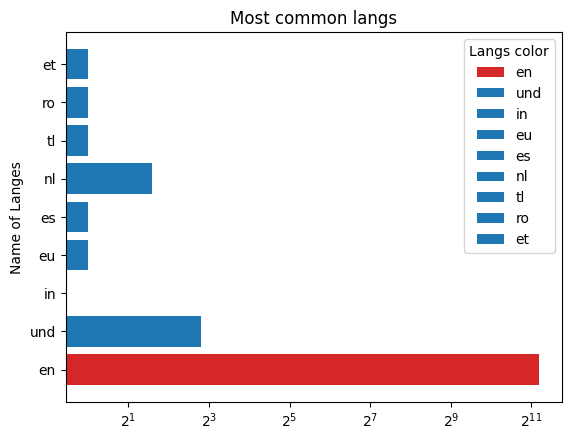

In [43]:

fig, ax = plt.subplots()

langes = ['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et']
counts = en, und, in_, eu, es, nl, tl, ro, et
bar_labels = ['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et']
bar_colors = ['tab:red', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.barh(langes, counts, label=bar_labels, color=bar_colors)
ax.set_xscale("log",base=2)
ax.set_ylabel('Name of Langes')
ax.set_title('Most common langs')
ax.legend(title='Langs color')
plt.savefig('Most common lang.png', bbox_inches='tight')
plt.show() # seems that English  is the most common lang


## <div style="text-align: left; background-color: #EF9C66 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">what is the most Dog Breed ??</div>

In [44]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [45]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False


## Issue : there is alot of dog names

## Define : there is alot of dog names i will chose one for every row according to the conf. of them

## code :



In [46]:

def get_breed(row):
  p1_conf = row['p1_conf']
  p2_conf = row['p2_conf']
  p3_conf = row['p3_conf']

  max_conf = max(p1_conf, p2_conf, p3_conf) # getting max value

  if max_conf == p1_conf: # then i see who is equal to the most value
    most_breed = row['p1']
  elif max_conf == p2_conf:
    most_breed = row['p2']
  else:
    most_breed = row['p3']

  return most_breed

image_predictions['Dog_Breed'] = image_predictions.apply(get_breed, axis=1)



## Test

In [47]:
image_predictions.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_Breed
752,688116655151435777,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1,pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_bullterrier,0.006864,True,pug


In [48]:
most_ten_repeated_dog_breed = image_predictions["Dog_Breed"].value_counts().nlargest(10)
most_ten_repeated_dog_breed

Dog_Breed
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: count, dtype: int64

In [49]:
most_ten_repeated_dog_breed.index.to_list()

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy_poodle',
 'Pomeranian',
 'cocker_spaniel']

In [50]:
most_ten_repeated_dog_breed.to_numpy()

array([150, 100,  89,  83,  57,  44,  43,  39,  38,  30], dtype=int64)

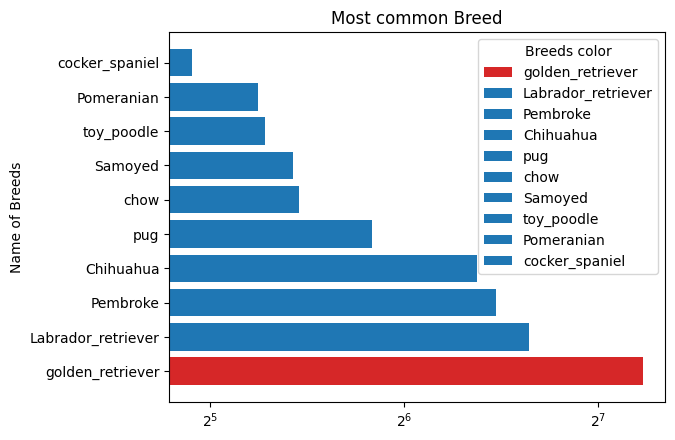

In [51]:

fig, ax = plt.subplots()

breed_names = most_ten_repeated_dog_breed.index.to_list()
counts = most_ten_repeated_dog_breed.to_numpy()
breed_names = most_ten_repeated_dog_breed.index.to_list()
bar_colors = ['tab:red', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.barh(breed_names, counts, label=breed_names, color=bar_colors)
ax.set_xscale("log",base=2)
ax.set_ylabel('Name of Breeds')
ax.set_title('Most common Breed')
ax.legend(title='Breeds color')
plt.savefig('Most common Breed.png', bbox_inches='tight')

plt.show() # seems that English  is the most common lang

## Issue : "entities" column is dic.

## Define : "entities" column is dic. that have a lot of values i have to extract width and height

## code :

In [52]:
df_json.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1233,2016-03-23 15:53:42+00:00,712668654853337088,712668654853337088,Say hello to Sunny and Roxy. They pull things ...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 712668618841042948, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,1367,4531,False,False,False,False,en,NaN,NaN,NaN,NaN


In [53]:
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [54]:
df_json["entities"][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [55]:
df_json["entities"][0].get("media")[0].get("sizes").get("large")

{'w': 540, 'h': 528, 'resize': 'fit'}

In [56]:
list_of_width = []
list_of_height = []

for entity in df_json.get("entities", []):
  media = entity.get("media")
  if media is not None:
    sizes = media[0].get('sizes')
    if sizes is not None:
      large_size = sizes.get("large")
      if large_size is not None:
        width = large_size.get("w")
        if width is not None:
          list_of_width.append(width)
        height = large_size.get("h")
        if height is not None:
          list_of_height.append(height)


In [57]:
list_of_width

[540,
 1407,
 1201,
 1201,
 720,
 899,
 768,
 1200,
 1201,
 1201,
 1601,
 895,
 1080,
 1201,
 1201,
 320,
 1201,
 1201,
 1600,
 1285,
 1600,
 480,
 900,
 1024,
 1590,
 1201,
 800,
 901,
 1201,
 1201,
 1200,
 1138,
 1536,
 1201,
 960,
 1234,
 1201,
 1600,
 1278,
 1175,
 1341,
 1280,
 1201,
 1201,
 1009,
 899,
 1200,
 749,
 576,
 1201,
 480,
 900,
 540,
 1201,
 1201,
 768,
 1110,
 1600,
 1279,
 718,
 1600,
 899,
 899,
 1536,
 750,
 1599,
 1481,
 1536,
 1600,
 1201,
 1201,
 1600,
 1201,
 1600,
 1201,
 720,
 1600,
 1201,
 1260,
 1600,
 1599,
 1201,
 1201,
 800,
 1182,
 583,
 1201,
 1586,
 1201,
 1201,
 1201,
 1600,
 1600,
 1201,
 901,
 1024,
 1600,
 1200,
 1014,
 1201,
 901,
 1228,
 1008,
 1201,
 1199,
 1024,
 1340,
 616,
 1201,
 1080,
 1601,
 901,
 1179,
 1201,
 900,
 1201,
 1402,
 1600,
 1600,
 1600,
 1201,
 320,
 1201,
 749,
 800,
 1599,
 1600,
 1600,
 901,
 1536,
 1600,
 640,
 1201,
 848,
 596,
 560,
 1279,
 1600,
 1200,
 1200,
 750,
 480,
 320,
 1600,
 899,
 1201,
 1201,
 1201,
 444,


In [58]:
list_of_height

[528,
 1600,
 1600,
 1600,
 540,
 899,
 1024,
 1328,
 1600,
 1600,
 1600,
 971,
 1350,
 1600,
 1600,
 568,
 1600,
 1600,
 1016,
 1600,
 900,
 480,
 1510,
 576,
 1582,
 1600,
 533,
 1600,
 1600,
 1600,
 1183,
 1117,
 2048,
 1600,
 1280,
 1338,
 1600,
 1562,
 1148,
 1438,
 1600,
 1600,
 1600,
 1600,
 1299,
 1116,
 1600,
 1017,
 1024,
 1600,
 480,
 612,
 1041,
 1600,
 1600,
 1024,
 1600,
 1201,
 1600,
 404,
 1482,
 1600,
 1155,
 2048,
 502,
 1115,
 1600,
 2048,
 1586,
 1600,
 1600,
 1201,
 1600,
 1201,
 1600,
 1280,
 1568,
 1600,
 1600,
 1201,
 1117,
 1600,
 1600,
 533,
 1160,
 479,
 1600,
 1600,
 1600,
 1600,
 1600,
 1201,
 1064,
 1600,
 1600,
 1024,
 1520,
 1600,
 761,
 1600,
 1600,
 1600,
 1203,
 1600,
 1280,
 1365,
 1600,
 306,
 1600,
 1440,
 1600,
 1600,
 1600,
 1600,
 1600,
 1600,
 1600,
 1201,
 1344,
 1201,
 1600,
 568,
 1600,
 1035,
 533,
 644,
 1201,
 1197,
 1600,
 2048,
 1575,
 800,
 1600,
 1131,
 596,
 850,
 1600,
 1920,
 1600,
 1600,
 1334,
 480,
 180,
 1133,
 1600,
 1600,
 16

In [59]:
list_of_height.extend([np.nan] * (len(df_json.index) - len(list_of_height)))
list_of_width.extend([np.nan] * (len(df_json.index) - len(list_of_width)))

df_json["Height"] = list_of_height
df_json["Width"] = list_of_width


In [60]:
df_json["Height"].dropna(inplace=True)
df_json["Width"].dropna(inplace=True)

## Test

In [61]:
df_json.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,Height,Width
945,2016-07-11 15:07:30+00:00,752519690950500352,752519690950500352,Hopefully this puppo on a swing will help get ...,False,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 752519679353257984, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,3917,8157,False,False,False,False,en,NaN,NaN,NaN,NaN,1024.0,1024.0


## Issue : Text range column

## Define :Text range columm is list

## code :

In [62]:
df_json["display_text_range"][0]

[0, 85]

In [63]:
first_num_text_range = df_json["display_text_range"].apply(lambda X:X[0])

In [64]:
second_num_text_range = df_json["display_text_range"].apply(lambda X:X[1])

In [65]:
df_json["first_num_text_range"] = first_num_text_range
df_json["second_num_text_range"] = second_num_text_range


In [66]:
df_json = df_json.drop(columns=["display_text_range"],axis=1)

## Test

In [67]:
df_json.sample(1)

,created_at,id,id_str,full_text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,Height,Width,first_num_text_range,second_num_text_range
1886,2015-12-10 02:44:43+00:00,674781762103414784,674781762103414784,Bedazzled pup here. Fashionable af. Super yell...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674781757573591040, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,1335,2169,False,False,False,False,en,NaN,NaN,NaN,NaN,1024.0,897.0,0,134


In [68]:
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'Height', 'Width', 'first_num_text_range',
       'second_num_text_range'],
      dtype='object')

In [69]:
twitter_archive_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [70]:
df_json.head()

,created_at,id,id_str,full_text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,Height,Width,first_num_text_range,second_num_text_range
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN,528.0,540.0,0,85
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN,1600.0,1407.0,0,138
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN,1600.0,1201.0,0,121
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN,1600.0,1201.0,0,79
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN,540.0,720.0,0,138


In [71]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [72]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'Dog_Breed'],
      dtype='object')

In [73]:
df_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'Height', 'Width', 'first_num_text_range',
       'second_num_text_range'],
      dtype='object')

In [74]:
df = pd.merge(twitter_archive_enhanced,image_predictions, on='tweet_id')
twitter_archive_enhanced_master= pd.merge(df,df_json, on=['in_reply_to_status_id'])
twitter_archive_enhanced_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_Breed,created_at,id,id_str,full_text,truncated,entities,extended_entities,source_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,Height,Width,first_num_text_range,second_num_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,orange,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN,528.0,540.0,0,85
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,orange,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN,1600.0,1407.0,0,138


In [75]:
twitter_archive_enhanced_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_Breed,created_at,id,id_str,full_text,truncated,entities,extended_entities,source_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,Height,Width,first_num_text_range,second_num_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,orange,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN,528.0,540.0,0,85
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,orange,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN,1600.0,1407.0,0,138


In [76]:
twitter_archive_enhanced_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'Dog_Breed', 'created_at', 'id', 'id_str', 'full_text',
       'truncated', 'entities', 'extended_entities', 'source_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'Height',

In [77]:
twitter_archive_enhanced_master = twitter_archive_enhanced_master.drop(columns=['in_reply_to_user_id_x','source_x',"text",'retweeted_status_id','doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id_str', 'full_text',
       'truncated','retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status','coordinates', 'place', 'contributors', 'is_quote_status','retweeted','first_num_text_range', 'second_num_text_range','retweet_count','retweeted_status_user_id', 'retweeted_status_timestamp','entities','id','in_reply_to_screen_name', 'user', 'geo','possibly_sensitive','possibly_sensitive_appealable','created_at',
       'id','extended_entities'
 ],axis=1)

In [78]:
# df_json.to_csv('outputs/json_output.txt', index=False)
# twitter_archive_enhanced.to_csv('outputs/twitter_archive_output.csv', index=False)
# image_predictions.to_csv('outputs/image_predictions_output.csv', index=False)

# twitter_archive_enhanced_master.to_csv('outputs/twitter_archive_enhanced_master.csv', index=False)

In [79]:
twitter_archive_enhanced_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'Dog_Breed',
       'source_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'favorite_count', 'favorited', 'lang',
       'Height', 'Width'],
      dtype='object')

## <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 8px 8px 0 0;  ">Modling 🤖 </div>

In [80]:
X = twitter_archive_enhanced_master[["Height","Width","favorite_count","Dog_Breed"]]
y = twitter_archive_enhanced_master["rating_numerator"]

In [81]:
X.shape

(4670377, 4)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [83]:
label_encoder = preprocessing.LabelEncoder()

In [84]:
X["Dog_Breed"] = label_encoder.fit_transform(X["Dog_Breed"])

C:\Users\marwa\AppData\Local\Temp\ipykernel_2276\1845947524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Dog_Breed"] = label_encoder.fit_transform(X["Dog_Breed"])


In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670377 entries, 0 to 4670376
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Height          float64
 1   Width           float64
 2   favorite_count  int64  
 3   Dog_Breed       int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 124.7 MB


In [86]:
X["Dog_Breed"].unique()

array([258,  22, 265,  94,  21,   8,  59,  40,  58,  64,  31, 185, 368,
        70, 229,  51, 221, 149, 285,  14,  44, 238,  42, 137,  32,  25,
        30, 367,  76,  63, 356, 327, 246,  33,  28, 353, 336, 359,  39,
       109,  13,  78, 141, 177,  20, 224,  52,  93,  67, 220, 216, 204,
        37, 146,  15, 278, 124, 240,  71,  45,  11,   9, 335, 171,  12,
       223, 135,   7, 295,  17,  56, 107, 189,  35,  90, 284,  91, 271,
       129,  79, 340, 299, 268, 178, 142, 302,   4, 369, 184,  24,  41,
       363, 355, 209, 245,   0,  19, 338, 334,  46,  16,  36, 105,  54,
         5, 347, 308, 251, 228, 375, 116,  61, 207,  60, 261,  95, 120,
       213,  57, 121, 348, 305, 202, 339, 145, 181,  27, 126, 163, 152,
        96, 239,  62,  34, 300,  80, 322, 248, 158,  73, 165, 294, 159,
       247, 167,  69,  98, 349, 234,  55, 306, 114, 250, 253, 358,  53,
       168, 266, 270, 372,  85, 211, 292, 293,  97, 281, 286, 280, 263,
       331, 140, 232,  75, 183, 310, 242,  49, 237,  92, 230, 15

In [87]:
X.sample(1)

,Height,Width,favorite_count,Dog_Breed
4640858,1600.0,1201.0,0,75


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670377 entries, 0 to 4670376
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Height          float64
 1   Width           float64
 2   favorite_count  int64  
 3   Dog_Breed       int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 124.7 MB


In [89]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4670377 entries, 0 to 4670376
Series name: rating_numerator
Non-Null Count    Dtype
--------------    -----
4670377 non-null  int64
dtypes: int64(1)
memory usage: 35.6 MB


In [90]:
X.isnull().sum()

Height            568405
Width             568405
favorite_count         0
Dog_Breed              0
dtype: int64

In [91]:
X = X.dropna()

In [92]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4670377 entries, 0 to 4670376
Series name: rating_numerator
Non-Null Count    Dtype
--------------    -----
4670377 non-null  int64
dtypes: int64(1)
memory usage: 35.6 MB


In [93]:
y.unique()

array([  13,   12,   14,    5,   11,   10,    6,   15,    0,   84,   24,
         75,   27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,
         99,   80,   45,   60,   44,  143,  121,   26,    2,  144,   88,
          1,  420], dtype=int64)

In [94]:
f"X shape :{X.shape[0]}, Y Shape :{y.shape[0]}, the greater is :{max(X.shape[0],y.shape[0])}"

'X shape :4101972, Y Shape :4670377, the greater is :4670377'

In [95]:
y = y[:4101972]

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [97]:
X_train = X_train[:100000]
X_test = X_test[:100000]
Y_train = Y_train[:100000]
Y_test = Y_test[:100000]

In [98]:
X_train.shape

(100000, 4)

In [99]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train,Y_train)

y_pred = model_LinearRegression.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1970.7586247233107
Root Mean Squared Error: 44.39322723933585
R-squared: 0.00030672133301246074


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [100]:
model_LogisticRegression = LogisticRegression(max_iter=2000)
model_LogisticRegression.fit(X_train,Y_train)

y_pred = model_LogisticRegression.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1971.798
Root Mean Squared Error: 44.40493215848888
R-squared: -0.00022051547066492816


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
model_Lasso =  linear_model.Lasso(alpha=0.1)
model_Lasso.fit(X_train,Y_train)

y_pred = model_Lasso.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 1970.7590968804946
Root Mean Squared Error: 44.393232557232125
R-squared: 0.00030648182505987887


In [102]:
model_random=  RandomForestClassifier(max_depth=2, random_state=0)
model_random.fit(X_train,Y_train)

y_pred = model_random.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1971.7862
Root Mean Squared Error: 44.40479929016682
R-squared: -0.00021452976519076294


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [103]:
GradientBoosting=  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GradientBoosting.fit(X_train,Y_train)

y_pred = GradientBoosting.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2064.88061
Root Mean Squared Error: 45.44095740628712
R-squared: -0.04743789582887348


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## So the Best model here is the Logistic Regression
## i dont wana fit it to the data cause it will take so much time and i only used 100000 data only cause the data is huge